# Safe and Sound Data Showdown

For details on the scope, prizes and phases of this challenge see: [Safe and Sound Data Showdown](https://app.humyn.ai/challenges/45f4da8a-8b1f-4640-ac26-1e476d27d004)

***

## Phase 1

> * A dot-point summary of your initial findings.
> * All the related resources (notebooks, code, models, etc.) associated your initial work.


**The goal of this challenge is to improve the safety for employees working within a large mining organisation.**


You’ll have access to datasets relating to the historical safety incidents themselves, mine site production, employee rosters / leave / duration, and much much more!

Can you use this data to help improve the safety for all current and future employees?

This phase will be judged on:

A report documenting your findings (in PDF format, or a well formatted notebook).

Code or assets produced during your analysis (notebooks, code files, models, visualisations etc).

**Description**
- Can you use your data science skills to help drive safety improvements within the resources sector?

- Can you analyse safety related datasets to discover useful & practical insights?

**Your Task**
- Your task is to use the provided datasets to uncover insights that reveal useful information around the safety of mine-site employees / contractors. 

- This mining organisation is looking to answer a broad range of questions relating to the analysis of these safety related datasets, from the highest-level...

**Analyse the provided datasets to uncover insights into what features are contributing to the observed safety incidents.**

Develop approaches that allow the safety team to provide insights / trends / actions back to the wider-business on the safety performance across time.

Identify where predictive models or machine learning approaches could provide value to the safety team to monitor / improve their safety performance.

In [3]:
# To Load the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Make Plotly work in your Jupyter Notebook
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [4]:
import os
os.getcwd()

'c:\\Users\\Dell\\Documents\\Humai\\adeleke-adedeji'

In [8]:
path="C:/Users/Dell/Documents/Humai/adeleke-adedeji/data"

In [9]:
os.chdir(path)

In [10]:
# To load the dataset into jupyter notebook
safety=pd.read_csv("safety_events.csv")
emp_start=pd.read_csv("emp_start_end_dates.csv")
employee_roster= pd.read_csv("employee_roster.csv")
labour_hours=pd.read_csv("labour_hours_worked.csv")
person_workgroup=pd.read_csv("person_workgroup.csv")
production_data=pd.read_csv("production_data.csv")
site_location=pd.read_csv("site_location.csv")

In [11]:
site_location.head()

,site_key_hashed,lat,lon
0,bf4065199d70073b,-20.708176,140.504777
1,53030efca88e7301,-25.259735,151.435822
2,28163a97aea8a693,-31.322330,119.125864
3,da820a60662e5c87,-20.220901,146.204969
4,350755ad348968b9,-24.929380,150.087177


In [12]:
safety.head()

,site_key_hashed,WorkGroupId,day,event_time,event_dt,event_reported_time,event_reported_dt,EventId,AgencyOfInjuryId,AgencyOfInjury,...,NatureOfInjury,NatureOfInjuryDecription,shift_commenced_day,shift_commenced_time,derived_shift_start_dt,shift_end_day,shift_end_time,derived_shift_end_dt,TimeBand,LTIDays
0,bf4065199d70073b,771,2000-06-25,21:30:00,2000-06-25T21:30:00Z,22:00:00,2000-06-25T22:00:00Z,560120,12,Outdoor environment,...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8117
1,bf4065199d70073b,771,2000-06-25,01:30:00,2000-06-25T01:30:00Z,02:00:00,2000-06-25T02:00:00Z,555108,2,Fixed Plant,...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8117
2,bf4065199d70073b,771,2000-07-18,06:10:00,2000-07-18T06:10:00Z,07:12:00,2000-07-18T07:12:00Z,554760,3,Mobile Plant,...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8094
3,bf4065199d70073b,771,2000-07-18,06:10:00,2000-07-18T06:10:00Z,07:12:00,2000-07-18T07:12:00Z,554760,2,Fixed Plant,...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8094
4,bf4065199d70073b,771,2000-08-12,11:10:00,2000-08-12T11:10:00Z,11:41:00,2000-08-12T11:41:00Z,556554,6,Powered equipment,...,Sprain and strains,Sprains and strains of joints and adjacent mus...,1900-01-01,0:00:00,1900-01-01T00:00:00Z,1900-01-01,12:00:00 AM,1900-01-01T00:00:00Z,NaN,8069


In [ ]:
emp_start.head()

In [ ]:
employee_roster.head()

In [ ]:
labour_hours.head()

In [ ]:
production_data.head()

In [ ]:
site_location.head()

### Q1. (Example: Does daylight savings time affect injury frequency?)

To explore this question, first I started by creating new dataframe and some new columns

In [13]:
# Converting the time/ date to datetime dtypes
safety["day"]=pd.to_datetime(safety["day"])
safety["event_dt"]=pd.to_datetime(safety["event_dt"])
safety["event_reported_dt"]=pd.to_datetime(safety["event_reported_dt"])
safety["event_time"]=pd.to_datetime(safety["event_time"])
safety["event_reported_time"]=pd.to_datetime(safety["event_reported_time"])

In [14]:
safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   site_key_hashed              6970 non-null   object             
 1   WorkGroupId                  6970 non-null   int64              
 2   day                          6970 non-null   datetime64[ns]     
 3   event_time                   6970 non-null   datetime64[ns]     
 4   event_dt                     6970 non-null   datetime64[ns, UTC]
 5   event_reported_time          2643 non-null   datetime64[ns]     
 6   event_reported_dt            2643 non-null   datetime64[ns, UTC]
 7   EventId                      6970 non-null   int64              
 8   AgencyOfInjuryId             6970 non-null   int64              
 9   AgencyOfInjury               6690 non-null   object             
 10  AgencyOfInjuryDescription    6690 non-null   obj

In [1]:
# code exploring question one

In [15]:
# Creating a new dataset for this  
period=pd.DataFrame()
period["Day"]=safety["day"].dt.day
period["Month"]=safety["day"].dt.month
period["Year"]=safety["day"].dt.year
period["Day_of_week"]=safety["day"].dt.dayofweek
period["Hour"]=safety["event_dt"].dt.hour


# 
perlist=[]
for hour in list(period.Hour):
    if hour in [4,5,6,7,8,9,10,11]:
        perlist.append("Morning")
    elif hour in [12,13,14,15]:
        perlist.append("Afternoon")
    elif hour in [16,17,18,19,]:
        perlist.append("Evening")
 
    else:
        perlist.append("Night")
        
        
period["Period_time"]=perlist

#
weeklist=[]
for day in list(period.Hour):
    if day < 5:
        weeklist.append("Weekend")
    else:
        weeklist.append("Week-Day")
    
    
period["week_type"]=weeklist

#
yearlist=[]
for hour in list(period.Month):
    if hour in [12,1,2,]:
        yearlist.append("Winter")
    elif hour in [3,4,5]:
        yearlist.append("Spring")
    elif hour in [6,7,8,]:
        yearlist.append("Summer")        
    else:
        yearlist.append("Autum")
        
        
period["Year_time"]=yearlist



- Winter – December, January and February.
- Spring – March, April and May.
- Summer – June, July and August.
- Autumn – September, October and November.

In [16]:
period.head()

,Day,Month,Year,Day_of_week,Hour,Period_time,week_type,Year_time
0,25,6,2000,6,21,Night,Week-Day,Summer
1,25,6,2000,6,1,Night,Weekend,Summer
2,18,7,2000,1,6,Morning,Week-Day,Summer
3,18,7,2000,1,6,Morning,Week-Day,Summer
4,12,8,2000,5,11,Morning,Week-Day,Summer


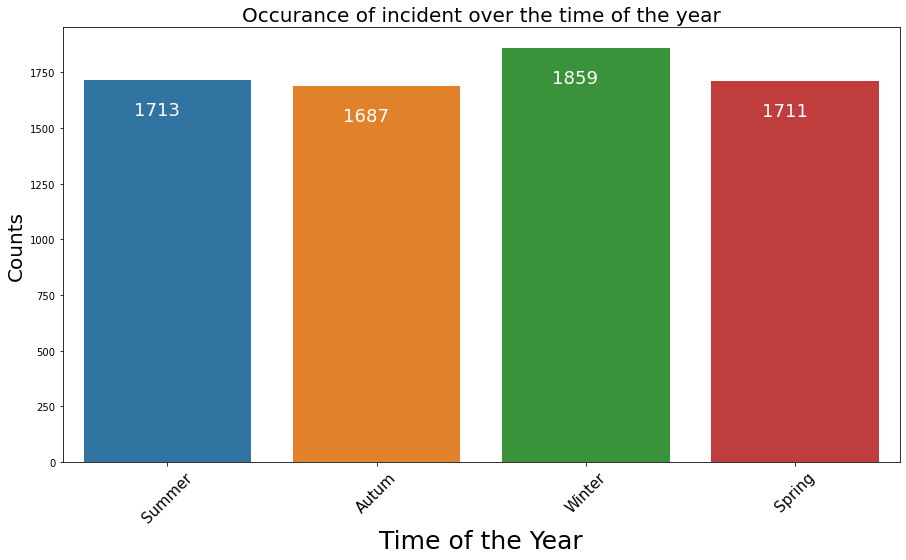

In [17]:

plt.figure(figsize=(15,8))
ax=sns.countplot(period["Year_time"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Time of the Year",size=25)
plt.title("Occurance of incident over the time of the year",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

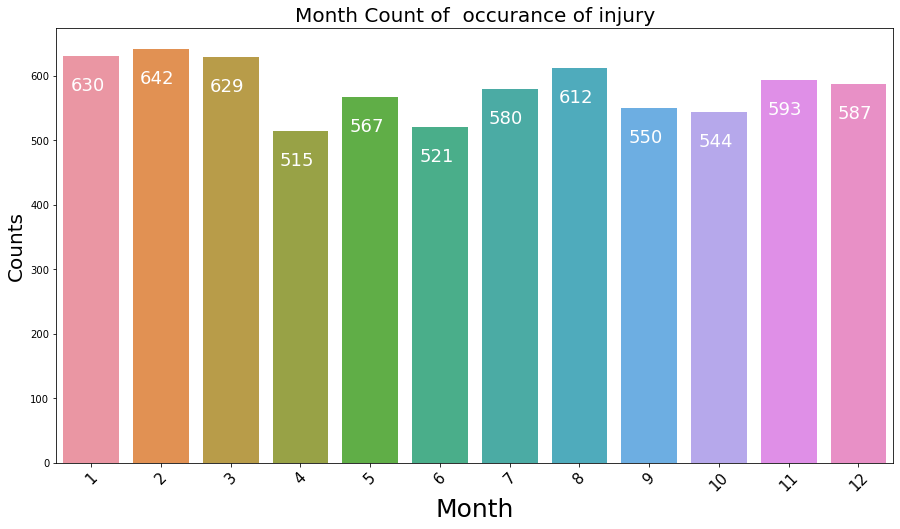

In [18]:
    plt.figure(figsize=(15,8))
    ax=sns.countplot(period["Month"])
    plt.xticks(rotation=45,size=15)
    plt.xlabel("Month",size=25)
    plt.title("Month Count of  occurance of injury",size=20)
    plt.ylabel("Counts",size=20)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
    plt.show()

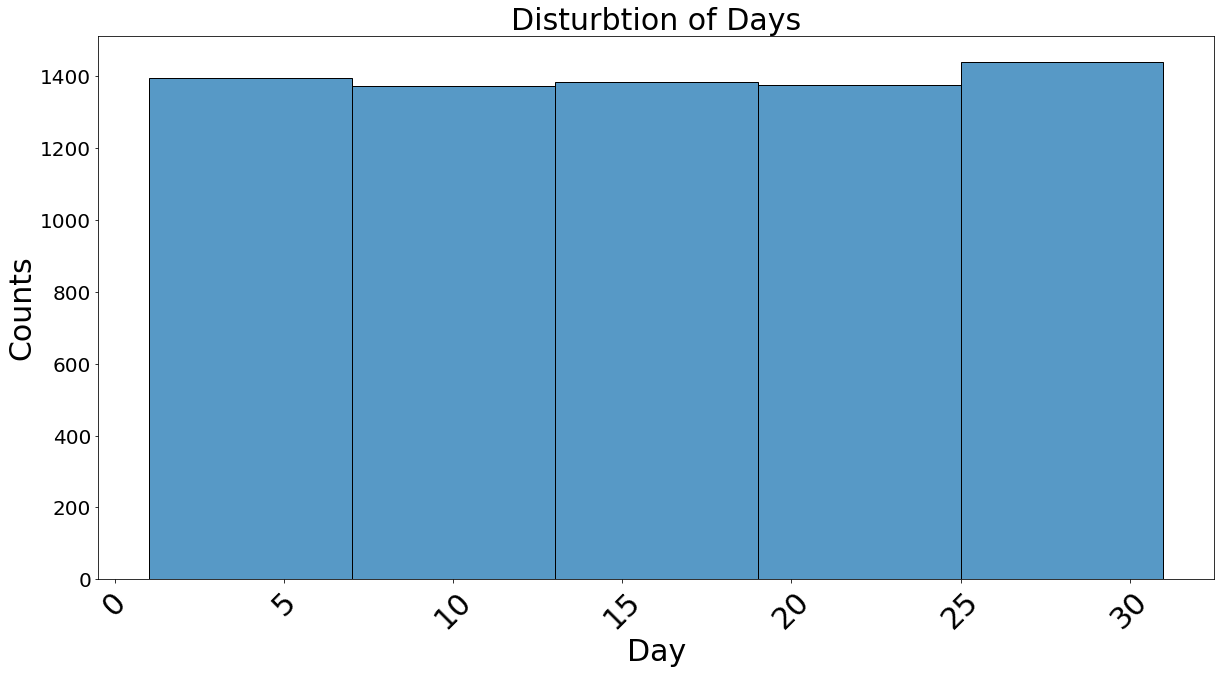

In [19]:
plt.figure(figsize=(20,10))
sns.histplot(period['Day'],bins=5)
plt.title("Disturbtion of Days",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Day",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

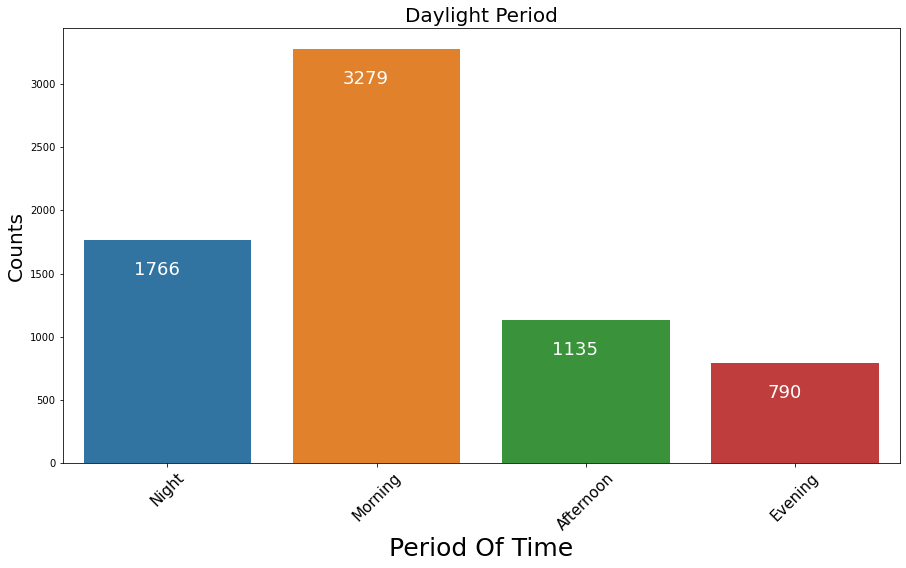

In [20]:
plt.figure(figsize=(15,8))
ax=sns.countplot(period["Period_time"])
plt.xticks(rotation=45,size=15)
plt.xlabel("Period Of Time",size=25)
plt.title("Daylight Period",size=20)
plt.ylabel("Counts",size=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [21]:
# holiday. WE need to check the location/country of the site 
import folium
map=folium.Map(zoom_start=14, control_scale=True)

In [22]:
for index, location_info in site_location.iterrows():
    folium.Marker([location_info["lat"], location_info["lon"]], popup=location_info["site_key_hashed"]).add_to(map)

In [23]:
map

### Q2. (Example: How have injuries changed over time?)

To explore this question, first I started by...

In [24]:
# code exploring question two
safety["site_key_hashed"].nunique() 

15

In [ ]:
safety["site_key_hashed"].unique() 

In [ ]:
site_location["site_key_hashed"].nunique() 

#### Site Where incident occur

In [ ]:
plt.figure(figsize=(15,8))
site_key_count=safety["site_key_hashed"].value_counts()
ax=site_key_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel(" Site_key_hashed",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Site location where injuries most",size=25)
plt.show()

In [ ]:
# Analysising  based on the site_location

safety_loc1=safety.query("site_key_hashed=='bf4065199d70073b'")

In [ ]:
#Teams involved in site_key_hashed(bf4065199d70073b)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc1["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

In [ ]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc1["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

In [ ]:
safety_loc2=safety.query("site_key_hashed=='53030efca88e7301'")

In [ ]:
#Teams involved in site_key_hashed(53030efca88e7301)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc2["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

In [ ]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc2["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

In [ ]:
# site 3
safety_loc3=safety.query("site_key_hashed=='28163a97aea8a693'")

In [ ]:
#Teams involved in site_key_hashed(53030efca88e7301)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc3["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

In [ ]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc3["Agency Of Injury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

In [ ]:
# site 4
safety_loc4=safety.query("site_key_hashed=='da820a60662e5c87'")

In [ ]:
#Teams involved in site_key_hashed('da820a60662e5c87)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc4["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

In [ ]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc4["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

In [ ]:
# site 5
safety_loc5=safety.query("site_key_hashed=='350755ad348968b9'")

In [ ]:
#Teams involved in site_key_hashed(350755ad348968b9)
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc5["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

In [ ]:
#types of activities involved at the site 
plt.figure(figsize=(15,8))
WorkGroup_count=safety_loc5["AgencyOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Work_group",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Activities that involved in the incident",size=25)
plt.show()

#### Teams involved in incidents

In [ ]:
# list of th work_group invoved in the minnng
print(f" There are {person_workgroup['work_group_id'].nunique()} group in Minning Organization")
person_workgroup["work_group_id"].unique()

In [ ]:
# list of group involved in the incident that occurs
print(f"There are {safety['WorkGroupId'].nunique()} groups")
safety['WorkGroupId'].unique()

In [ ]:
plt.figure(figsize=(15,8))
WorkGroup_count=safety["WorkGroupId"].value_counts()
ax=WorkGroup_count[:20].plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Description Of Theft that Happened",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

### Is there any pattern within the prevalence of certain types of injuries? Are any specific body parts always involved? How is injury severity seen to differ?

In [ ]:
safety["NatureOfInjury"].value_counts()

In [ ]:
plt.figure(figsize=(15,8))
WorkGroup_count=safety["NatureOfInjury"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Description Of Theft that Happened",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top  that involved in the incident",size=25)
plt.show()

In [ ]:
safety["BodyPart"].unique()

In [ ]:
plt.figure(figsize=(15,8))
WorkGroup_count=safety["BodyPart"].value_counts()
ax=WorkGroup_count.plot.bar(color="darkblue")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Description Of Theft that Happened",size=20)
plt.ylabel("COUNT ",size=20)
plt.xticks(rotation=90,size=15)
plt.title("Top 20 Groups that involved in the incident",size=25)
plt.show()

Severity Rate(S.R): The  severity rate is the total number of days lost or charged due to accidents per one million man-hours worked.
nunber of workers=employee_roster['name_hash'].nunique()=3073
average worker per day= 24

In [ ]:
employee_roster['name_hash'].nunique()

In [25]:
employee_roster.head()

,date,name_hash,scheduled_work_hours,leave_type,leave_start_date_utc,leave_end_date_utc
0,2021-11-01,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
1,2021-11-02,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
2,2021-11-03,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
3,2021-11-04,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN
4,2021-11-05,45888e1fa8dc1ba4,12.00,NaN,NaN,NaN


In [ ]:
df_Prim=safety.groupby(by="NatureOfInjury",)["LTIDays"].sum().reset_index().sort_values(ascending=False,by="LTIDays")
df_Prim["severity rate"]=(df_Prim["LTIDays"]/(3073*24))

In [ ]:
grp=safety.groupby(by="Injury")["day"].count().sort_values(ascending=False).reset_index(name="counts")
grp

### Summary of findings

* ...

***

## Phase 2

> * A report documenting your findings (in PDF format, or a very well formatted notebook).
> * All the related resources (notebooks, code, models, etc.) associated with your final 
.

### Executive Summary

### Introduction

### Analysis

### Conclusion

How valuable was your analysis? What are the practical impacts of your analysis for safety within this mining organisation? Are there any improvements you could make to your analysis in the future? Any data you feel like was important, but it was missing? Any oppurtunities for machine learning models that could provide value? etc.